### Problem 1.3

In [9]:
import random

# Transition probabilities
transition_probs = {
    'Sunny': {'Sunny': 1/2, 'Rainy': 1/3, 'Overcast': 1/6},
    'Rainy': {'Sunny': 1/4, 'Rainy': 1/2, 'Overcast': 1/4},
    'Overcast': {'Sunny': 1/5, 'Rainy': 2/5, 'Overcast': 2/5}
}

# Number of Parallel Simulations
num_parallel_sims = 190

# Start state
current_state = 'Sunny'

# Simulation for 30 days
days = 30
chain = []

# Aggregating the count of weather type for a day 
daily_weather_counter = {f"Day {i}":{} for i in range(1,days+1)}


for i in range(1, days+1):
    parallel_sims_weather_counter = {"Sunny":0,"Rainy":0,"Overcast":0}
    for _ in range(num_parallel_sims):
        # Get the transition probabilities for the current state
        transition_probs_current = transition_probs[current_state]

        # Get the possible next states
        next_states = list(transition_probs_current.keys())

        # Get the probabilities for the next states
        probabilities = list(transition_probs_current.values())

        # Sample the next state based on the probabilities
        next_state = random.choices(next_states, probabilities)[0]
        parallel_sims_weather_counter[next_state] += 1

        # Update the current state
        current_state = next_state

        # Append the current state to the chain
        chain.append(current_state)
    
    # Storing the dictionary in a array Day wise
    daily_weather_counter[f"Day {i}"].update(parallel_sims_weather_counter)
    
# Plotting the histogram for 30 days
# for day, state in enumerate(chain, 1):
#     print(f"Day {day}: {state}")

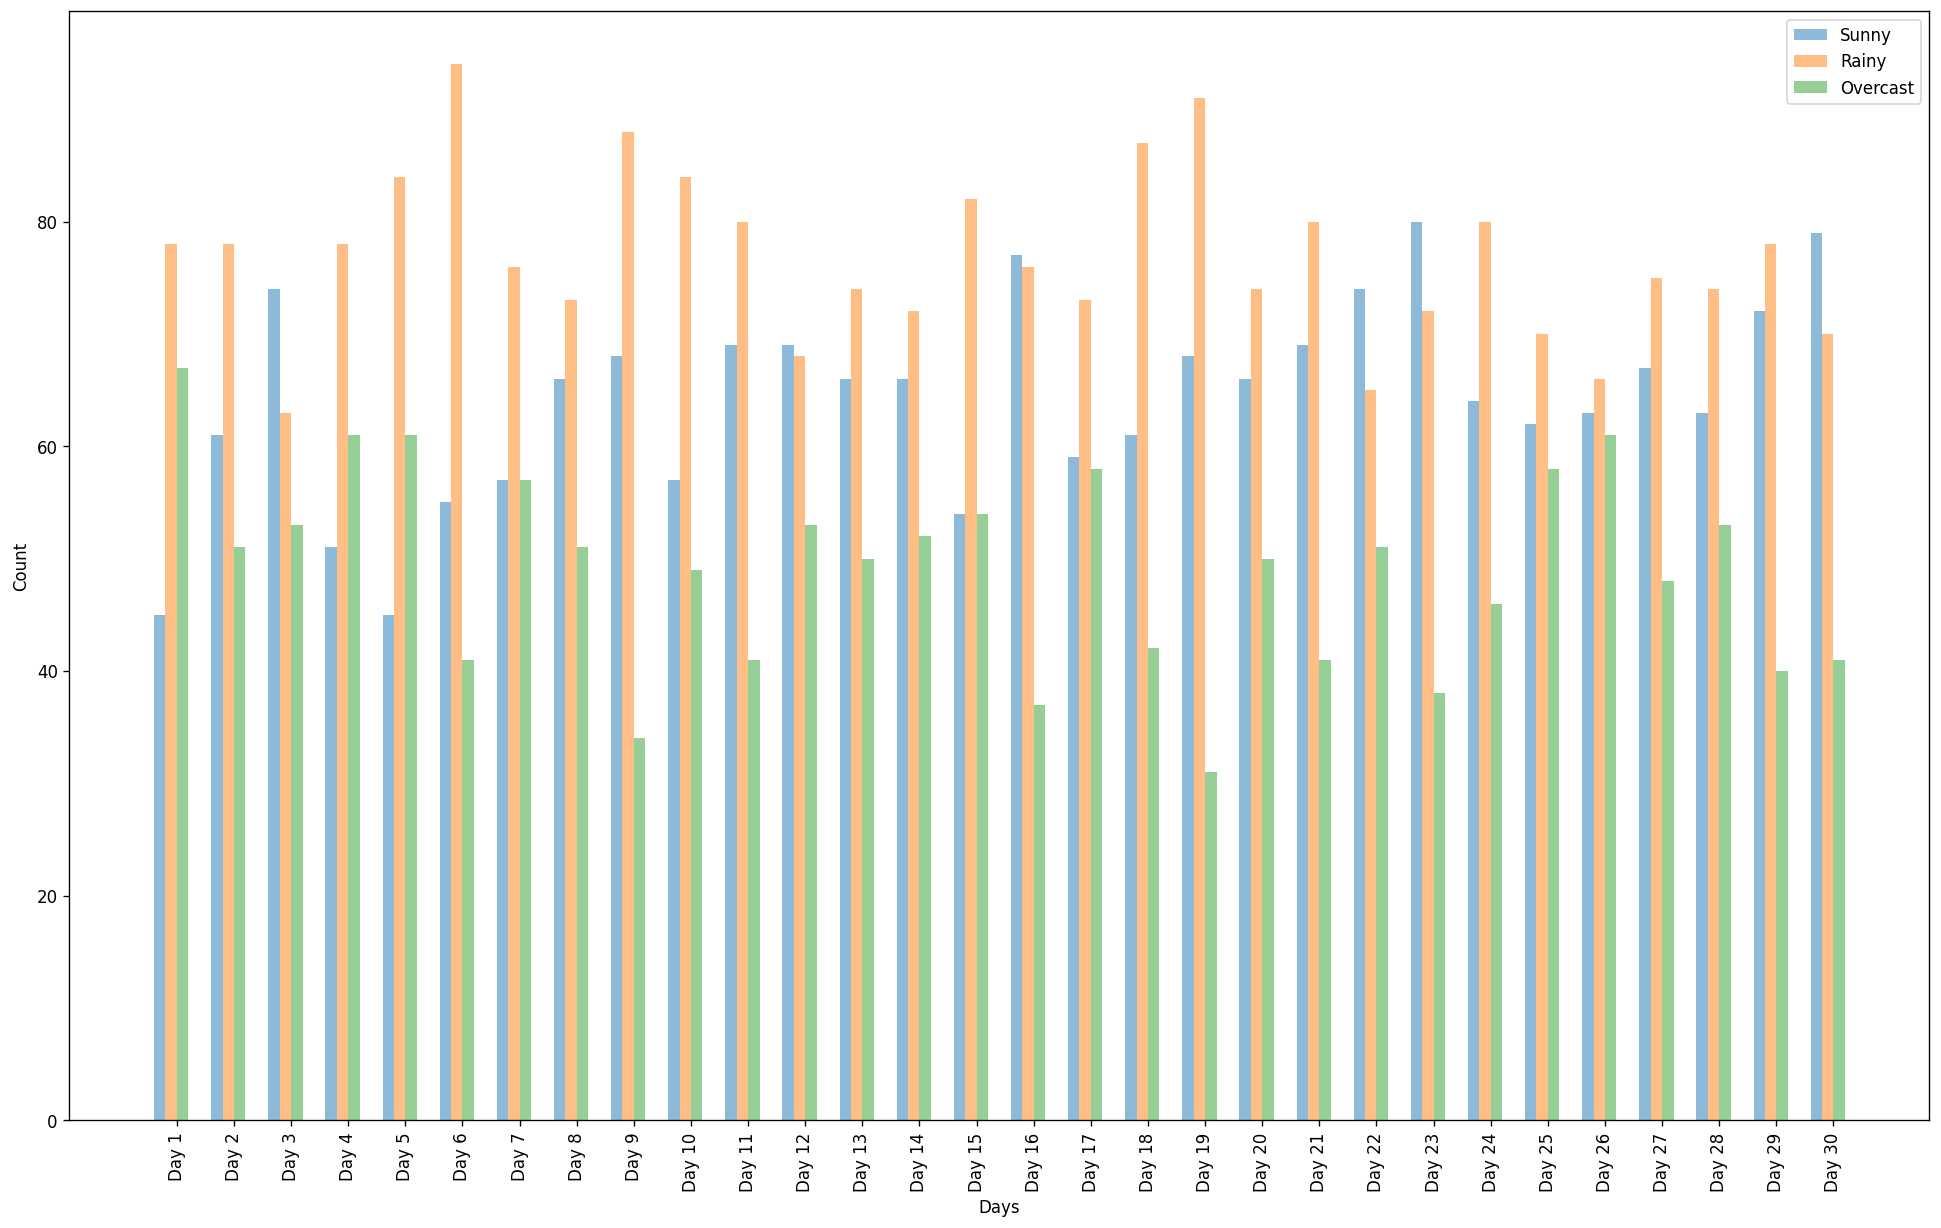

In [23]:
import numpy as np
import matplotlib.pyplot as plt

data = daily_weather_counter

# Extract the labels (Sunny, Rainy, Overcast)
labels = list(data['Day 1'].keys())

# Create an array of x-coordinates for each day
x = np.arange(len(data))

# Set the width of each bar
bar_width = 0.2

# Create the figure and axis
fig, ax = plt.subplots(figsize = (20,12), dpi = 120)

# Iterate over each weather category
for i, weather in enumerate(labels):
    # Get the counts for the current weather category
    counts = [day[weather] for day in data.values()]
    
    # Calculate the x-positions for the bars
    x_pos = x + (i * bar_width) - (bar_width * len(labels) / 2)
    
    # Plot the histogram for the current weather category
    ax.bar(x_pos, counts, width=bar_width, alpha=0.5, label=weather)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(data.keys(), rotation  = 90)
ax.set_xlabel('Days')
ax.set_ylabel('Count')

# Set the legend
ax.legend()

# Show the plot
plt.show()

#### Comparision with Invariate measure
Invariate measure p = {$\frac{12}{25},\frac{8}{25},\frac{1}{5}$}